<a href="https://colab.research.google.com/github/shamshekhar0/AI-ML-Intern-Works/blob/main/Car_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading dataset...
Dataset loaded successfully.

Step 2: Creating a backup of the dataset...
Backup created.

Step 3: Starting data cleaning...
   Cleaning 'year' column...
   'year' column cleaned.

   Cleaning 'Price' column...
   'Price' column cleaned.

   Cleaning 'kms_driven' column...
   'kms_driven' column cleaned.

   Dropping rows with missing 'fuel_type' values...
   Missing 'fuel_type' values handled.

   Resetting index of the cleaned dataset...
   Index reset.

   Filtering out rows with 'Price' above 6,000,000...
   Outliers in 'Price' handled.

Data cleaning completed.

Step 4: Generating visualizations...
   Creating boxplot: Company vs Price...


<ipython-input-8-1da2de3d5669>:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


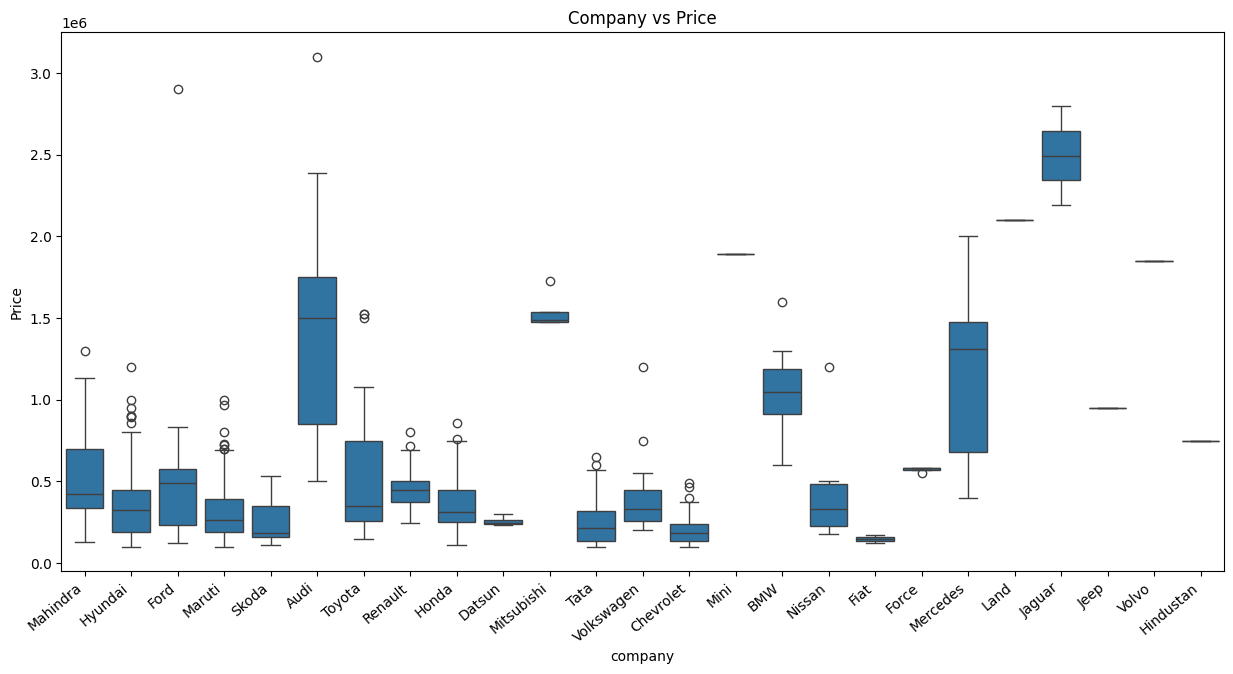

   Boxplot created.

   Creating swarmplot: Year vs Price...


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-8-1da2de3d5669>:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot 

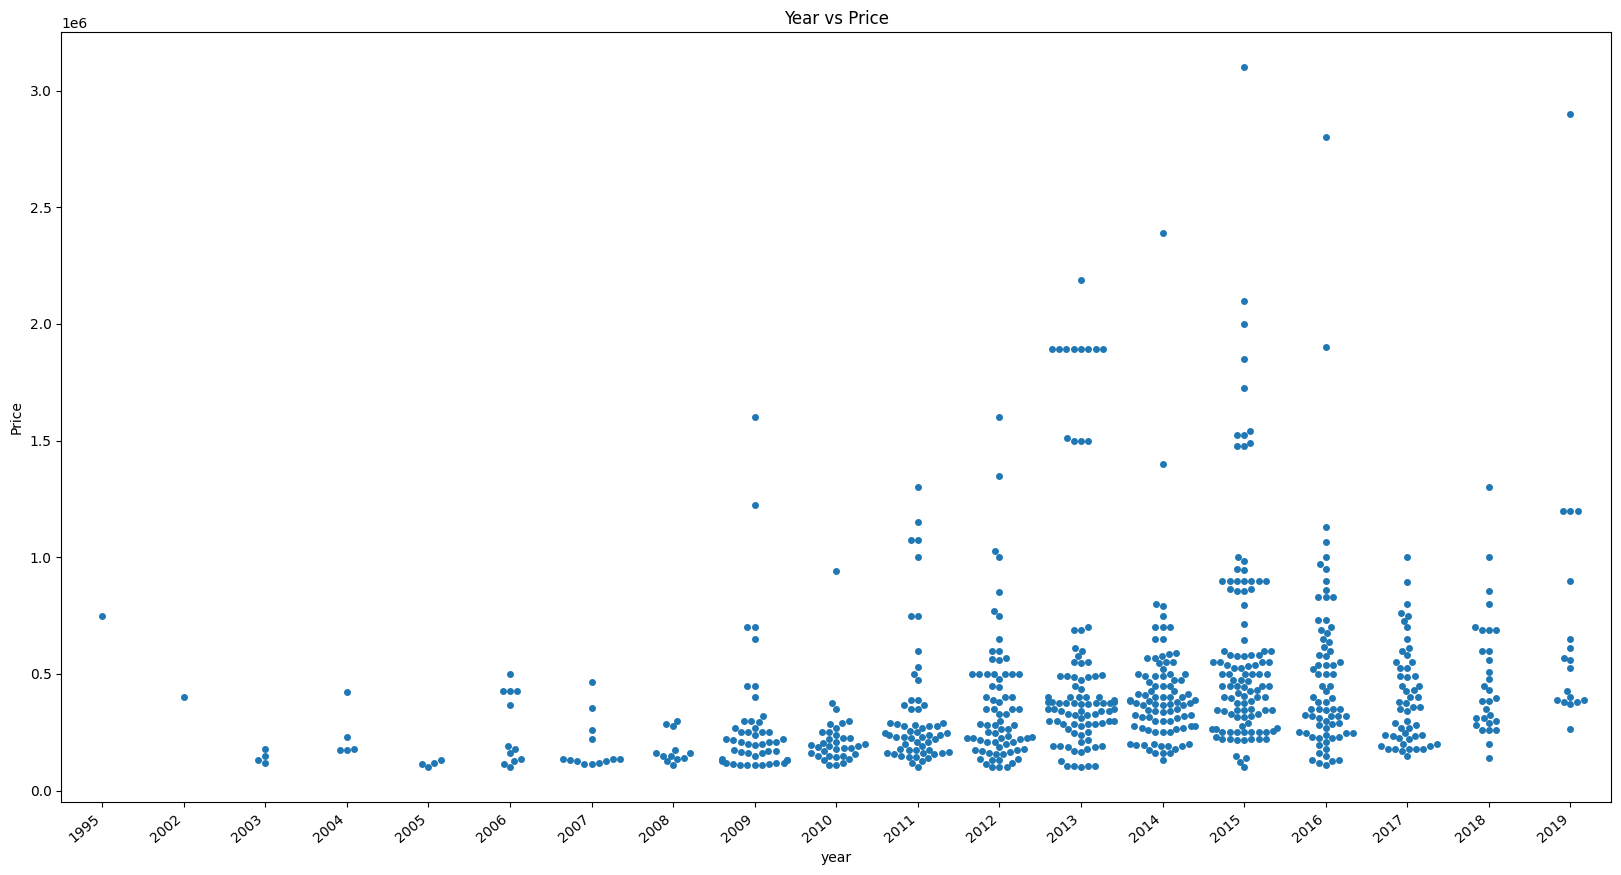

   Swarmplot created.

   Creating relplot: Kms Driven vs Price...


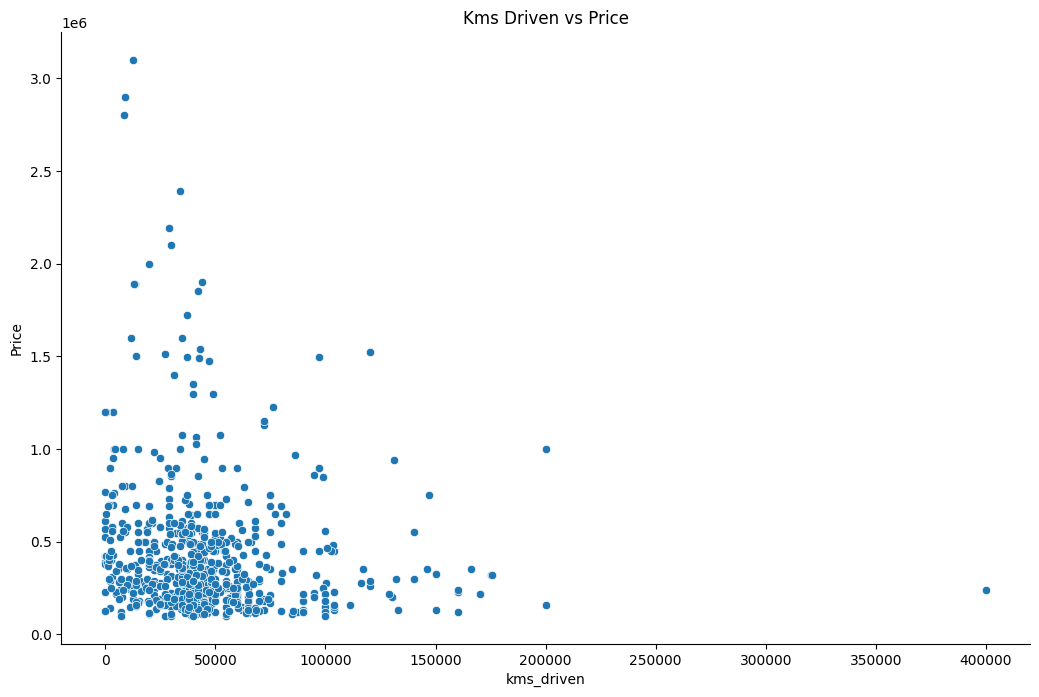

   Relplot created.

   Creating boxplot: Fuel Type vs Price...


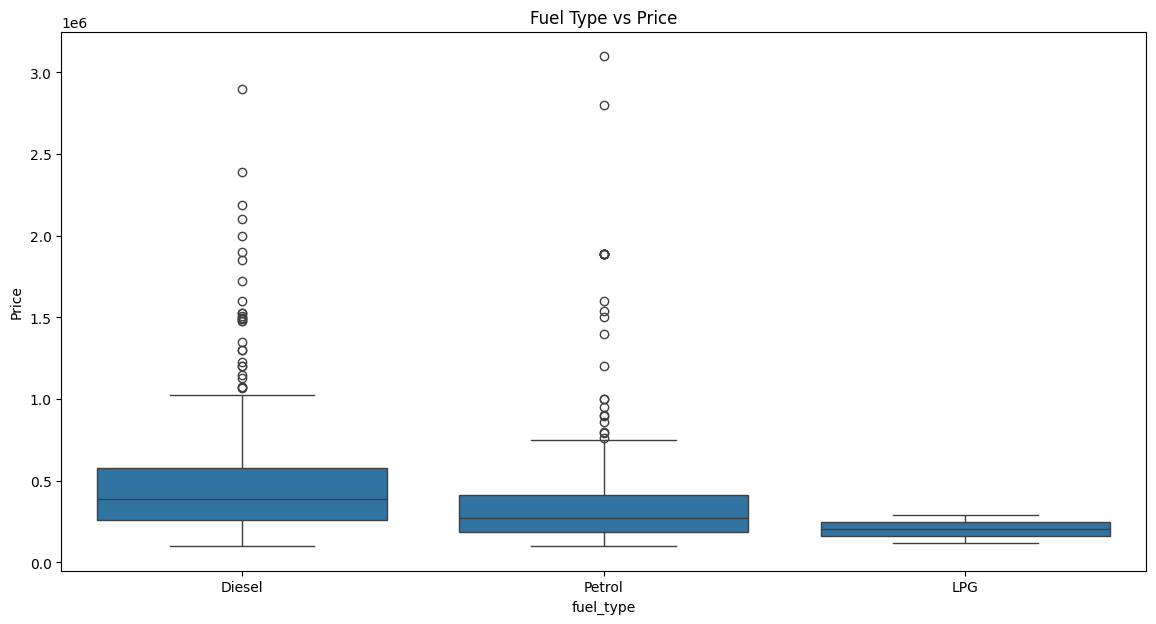

   Boxplot created.

Visualizations completed.

Step 5: Preparing training data...
Training data prepared.

Step 6: Splitting data into training and testing sets...
Data split completed.

Step 7: Training the model...
Model trained successfully.

Step 9: Saving the model...
Model saved successfully.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import pickle

# Load the dataset
print("Step 1: Loading dataset...")
car = pd.read_excel('/content/quikr_car.xlsx')  # Update path if needed
print("Dataset loaded successfully.\n")

# Backup copy of the data
print("Step 2: Creating a backup of the dataset...")
backup = car.copy()
print("Backup created.\n")

# Data Cleaning
print("Step 3: Starting data cleaning...")

# Clean the 'year' column: First, handle NaN values and then check for numeric entries
print("   Cleaning 'year' column...")

# Convert 'year' to string and drop rows with NaN values
car['year'] = car['year'].astype(str)
car = car[car['year'].notna()]

# Keep only rows where 'year' is numeric
car = car[car['year'].str.isnumeric()]

# Convert 'year' to integer after filtering
car['year'] = car['year'].astype(int)

print("   'year' column cleaned.\n")

# Clean the 'Price' column
print("   Cleaning 'Price' column...")

# Remove rows where 'Price' is "Ask For Price" and handle NaN values
car = car[car['Price'] != 'Ask For Price']

# Remove commas and convert 'Price' to numeric, forcing errors to NaN, then drop NaN values
car['Price'] = pd.to_numeric(car['Price'].str.replace(',', '', regex=False), errors='coerce')

# Drop rows where 'Price' is NaN
car = car.dropna(subset=['Price'])

# Convert 'Price' to integer after handling NaN values
car['Price'] = car['Price'].astype(int)

print("   'Price' column cleaned.\n")


# Process 'kms_driven' to remove 'kms', commas, and convert to integers
print("   Cleaning 'kms_driven' column...")
car['kms_driven'] = car['kms_driven'].str.split().str.get(0).str.replace(',', '')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)
print("   'kms_driven' column cleaned.\n")

# Drop rows with missing values in 'fuel_type'
print("   Dropping rows with missing 'fuel_type' values...")
car = car[~car['fuel_type'].isna()]
print("   Missing 'fuel_type' values handled.\n")

# Reset index after cleaning
print("   Resetting index of the cleaned dataset...")
car = car.reset_index(drop=True)
print("   Index reset.\n")

# Keep prices below 6,000,000
print("   Filtering out rows with 'Price' above 6,000,000...")
car = car[car['Price'] < 6000000]
print("   Outliers in 'Price' handled.\n")

print("Data cleaning completed.\n")

# Data Visualization
print("Step 4: Generating visualizations...")

# Boxplot: Company vs Price
print("   Creating boxplot: Company vs Price...")
plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x='company', y='Price', data=car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.title("Company vs Price")
plt.show()
print("   Boxplot created.\n")

# Swarmplot: Year vs Price
print("   Creating swarmplot: Year vs Price...")
plt.subplots(figsize=(20, 10))
ax = sns.swarmplot(x='year', y='Price', data=car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.title("Year vs Price")
plt.show()
print("   Swarmplot created.\n")

# Relplot: Kms Driven vs Price
print("   Creating relplot: Kms Driven vs Price...")
sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5)
plt.title("Kms Driven vs Price")
plt.show()
print("   Relplot created.\n")

# Boxplot: Fuel Type vs Price
print("   Creating boxplot: Fuel Type vs Price...")
plt.subplots(figsize=(14, 7))
sns.boxplot(x='fuel_type', y='Price', data=car)
plt.title("Fuel Type vs Price")
plt.show()
print("   Boxplot created.\n")

print("Visualizations completed.\n")

# Prepare Training Data
print("Step 5: Preparing training data...")
X = car[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
y = car['Price']
print("Training data prepared.\n")

# Train-Test Split
print("Step 6: Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Data split completed.\n")

# Step 7: Train the model...
print("Step 7: Training the model...")

# Column transformer: Apply OneHotEncoder to categorical columns
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
model_pipeline = make_pipeline(column_transformer, LinearRegression())

# Train the model
model_pipeline.fit(X_train, y_train)
print("Model trained successfully.\n")

# Create column transformer with handle_unknown='ignore' for OneHotEncoder
column_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
model_pipeline = make_pipeline(column_transformer, LinearRegression())


# Step 9: Save the model
print("Step 9: Saving the model...")

# Save the trained model as a pickle file
with open('car_price_predictor.pkl', 'wb') as model_file:
    pickle.dump(model_pipeline, model_file)

print("Model saved successfully.\n")

# You can now use this model to predict car prices for new data.


In [ ]:
# Step 1: Fit the model pipeline on the training data
print("Fitting the model pipeline...")
model_pipeline.fit(X_train, y_train)
print("Model pipeline fitted successfully.\n")

# Step 2: Now predict the price of the new cars
predicted_prices = model_pipeline.predict(new_data)

# Step 3: Display predicted prices
for car, price in zip(new_data['name'], predicted_prices):
    print(f"The predicted price of {car} is: Rs.{price:.2f}")


Fitting the model pipeline...
Model pipeline fitted successfully.

The predicted price of Toyota Corolla Altis Petrol Ltd is: Rs.513566.52
The predicted price of Honda Amaze 1.5 SX i DTEC is: Rs.623617.23
The predicted price of Hyundai Verna 1.6 SX VTVT AT is: Rs.456604.91
The predicted price of Maruti Suzuki Zen Estilo is: Rs.230526.26
The predicted price of Volkswagen Jetta Comfortline 1.9 TDI AT is: Rs.519100.94
The predicted price of Tata Aria Pleasure 4X2 is: Rs.309962.91
The predicted price of Renault Duster 110 PS RxZ Diesel is: Rs.480098.74
The predicted price of Nissan Micra XL is: Rs.741277.50
The predicted price of Chevrolet Cruze LTZ AT is: Rs.243669.64
The predicted price of Hyundai Eon Sportz is: Rs.426888.88
